In [1]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Articles
data_dir = "../data"
articles = pd.read_csv('articles.csv')

In [3]:
# Load Customers
data_dir = "../data"
customers = pd.read_csv('customers.csv')

In [4]:
# Load Transactions
data_dir = "../data"
transactions = pd.read_csv('transactions_train.csv')

In [5]:
###AGE###

# Replacing NaN values with the mean
missing_values = customers['age'].isna().sum()
mean_age = math.floor(customers['age'].mean())
customers['age'].fillna(mean_age, inplace=True)

# Check for missing values after
print(f"{missing_values} Missing Values Count in 'age' replaced with mean of {mean_age}")

15861 Missing Values Count in 'age' replaced with mean of 36


In [6]:
import pandas as pd

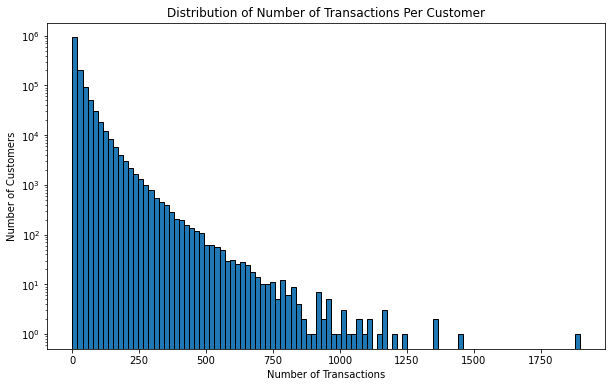

count    1.362281e+06
mean     2.333463e+01
std      3.924225e+01
min      1.000000e+00
25%      3.000000e+00
50%      9.000000e+00
75%      2.700000e+01
max      1.895000e+03
Name: customer_id, dtype: float64


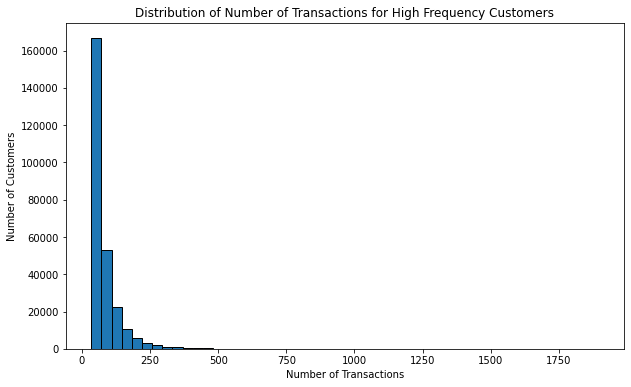

In [7]:
# analyze dist. of purchase frequencies among customers
# Calculate the number of transactions per customer
transaction_counts = transactions['customer_id'].value_counts()

# Plot the distribution of transaction counts
plt.figure(figsize=(10, 6))
transaction_counts.hist(bins=100, grid=False, edgecolor='black')
plt.title('Distribution of Number of Transactions Per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.yscale('log')  # Using a log scale due to wide distribution ranges
plt.show()

# Describe the distribution
print(transaction_counts.describe())

# You might also want to look more closely at the higher end of the distribution
# Filter to only those customers who are above a certain percentile, e.g., 90th
high_frequency_customers = transaction_counts[transaction_counts > transaction_counts.quantile(0.80)]

# Plot the distribution of the high frequency transaction counts
plt.figure(figsize=(10, 6))
high_frequency_customers.hist(bins=50, grid=False, edgecolor='black')
plt.title('Distribution of Number of Transactions for High Frequency Customers')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()

In [8]:
# Define frequent buyers as those with more transactions than the 75th percentile
frequent_buyer_threshold = transaction_counts.quantile(0.80)
frequent_buyers = transaction_counts[transaction_counts > frequent_buyer_threshold].index

print(f"The threshold for frequent buyers is more than {frequent_buyer_threshold} transactions.")

The threshold for frequent buyers is more than 34.0 transactions.


In [9]:
# Add a column to count transactions per customer
transactions['transaction_count'] = transactions.groupby('customer_id')['customer_id'].transform('count')

# Label frequent buyers
transactions['frequent_buyer'] = transactions['transaction_count'] > transactions['transaction_count'].quantile(0.80)

# Count unique frequent buyers
num_frequent_buyers = transactions[transactions['frequent_buyer']]['customer_id'].nunique()
print(f"Number of frequent buyers: {num_frequent_buyers}")

Number of frequent buyers: 30448


In [10]:
# Identify frequent buyer IDs
frequent_buyer_ids = transactions[transactions['frequent_buyer']]['customer_id'].unique()

# Now filter the transactions to include only those that belong to frequent buyers
transactions_frequent = transactions[transactions['customer_id'].isin(frequent_buyer_ids)]

In [11]:
unique_colours = articles['colour_group_name'].unique()

print(unique_colours)

['Black' 'White' 'Off White' 'Light Beige' 'Beige' 'Grey' 'Light Blue'
 'Light Grey' 'Dark Blue' 'Dark Grey' 'Pink' 'Dark Red' 'Greyish Beige'
 'Light Orange' 'Silver' 'Gold' 'Light Pink' 'Dark Pink' 'Yellowish Brown'
 'Blue' 'Light Turquoise' 'Yellow' 'Greenish Khaki' 'Dark Yellow'
 'Other Pink' 'Dark Purple' 'Red' 'Transparent' 'Dark Green' 'Other Red'
 'Turquoise' 'Dark Orange' 'Other' 'Orange' 'Dark Beige' 'Other Yellow'
 'Light Green' 'Other Orange' 'Purple' 'Light Red' 'Light Yellow' 'Green'
 'Light Purple' 'Dark Turquoise' 'Other Purple' 'Bronze/Copper'
 'Other Turquoise' 'Other Green' 'Other Blue' 'Unknown']


In [12]:
# Merge the transactions with the articles to get the 'colour_group_name' for each transaction
merged_df = pd.merge(transactions_frequent, articles[['article_id', 'colour_group_name', 'product_group_name']], on='article_id', how='left')

# Calculate the top two colors for each customer
top_two_colors = (
    merged_df[merged_df['customer_id'].isin(frequent_buyers)]
    .groupby('customer_id')['colour_group_name']
    .apply(lambda x: x.value_counts().nlargest(2).index.tolist())
    .reset_index()
)

# Calculate the top two colors for each customer
top_two_categories = (
    merged_df[merged_df['customer_id'].isin(frequent_buyers)]
    .groupby('customer_id')['product_group_name']
    .apply(lambda x: x.value_counts().nlargest(2).index.tolist())
    .reset_index()
)

In [13]:
color_opposites = {
    'Black': 'White',
    'White': 'Black',
    'Off White': 'Dark Grey',  # Off-white is a light shade, so pairing with a dark
    'Light Beige': 'Dark Brown',  # Assuming 'Dark Brown' is represented by 'Yellowish Brown'
    'Beige': 'Grey',  # Neutral tones
    'Grey': 'Beige',
    'Light Blue': 'Dark Orange',  # Complementary colors
    'Light Grey': 'Dark Grey',
    'Dark Blue': 'Light Orange',
    'Dark Grey': 'Off White',
    'Pink': 'Green',  # Red's complement is green; pink is a tint of red
    'Dark Red': 'Light Green',
    'Greyish Beige': 'Blue',  # Cool vs warm tones
    'Light Orange': 'Dark Blue',
    'Silver': 'Gold',
    'Gold': 'Silver',
    'Light Pink': 'Dark Green',
    'Dark Pink': 'Light Green',
    'Yellowish Brown': 'Light Blue',
    'Blue': 'Orange',  # Complementary colors
    'Light Turquoise': 'Dark Purple',
    'Yellow': 'Purple',  # Complementary colors
    'Greenish Khaki': 'Pink',
    'Dark Yellow': 'Purple',
    'Other Pink': 'Other Green',  # Using 'Other' to stay within the list
    'Dark Purple': 'Light Turquoise',
    'Red': 'Green',  # Complementary colors
    'Transparent': 'Opaque',  # 'Opaque' isn't in the list but represents the concept
    'Dark Green': 'Light Pink',
    'Other Red': 'Other Green',
    'Turquoise': 'Dark Red',
    'Dark Orange': 'Light Blue',
    'Other': 'Unknown',  # Using 'Unknown' as a wildcard
    'Orange': 'Blue',
    'Dark Beige': 'Grey',
    'Other Yellow': 'Other Purple',
    'Light Green': 'Dark Pink',
    'Other Orange': 'Other Blue',
    'Purple': 'Yellow',
    'Light Red': 'Light Green',
    'Light Yellow': 'Dark Purple',
    'Green': 'Red',
    'Light Purple': 'Yellowish Brown',
    'Dark Turquoise': 'Dark Red',
    'Other Purple': 'Other Yellow',
    'Bronze/Copper': 'Silver',  # Metallics don't have true opposites, but silver contrasts both
    'Other Turquoise': 'Other Orange',
    'Other Green': 'Other Pink',
    'Other Blue': 'Other Orange',
    'Unknown': 'Other',  # Again, 'Unknown' can be paired with 'Other'
}

In [14]:
category_opposites = {
    'Garment Upper body': 'Accessories',
    'Underwear': 'Garment Full body',  # implying that 'Garment Full body' might be more outerwear
    'Socks & Tights': 'Swimwear',
    'Garment Lower body': 'Bags',
    'Accessories': 'Nightwear',  # Different use scenarios
    'Items': 'Stationery',  # Broad category vs. specific items
    'Nightwear': 'Shoes',  # Different purposes
    'Unknown': 'Underwear/nightwear,  # Here would be a placeholder for any known category',
    'Underwear/nightwear': 'Outerwear',  # Assuming 'Outerwear' is represented by 'Garment Upper/Lower body'
    'Shoes': 'Cosmetic',
    'Swimwear': 'Socks & Tights',
    'Garment Full body': 'Furniture',
    'Cosmetic': 'Garment and Shoe care',  # Personal use vs. items for personal belongings
    'Interior textile': 'Fun',  # Home items vs. items associated with leisure
    'Bags': 'Garment Lower body',
    'Furniture': 'Underwear',
    'Garment and Shoe care': 'Interior textile',
    'Fun': 'Garment Upper body',  # Leisure vs. a category of clothing
    'Stationery': 'Items',
}


In [15]:
# Function to apply the mapping
def get_opposites_color(color_list):
    return [color_opposites.get(color, "Unknown") for color in color_list]

def get_opposites_cat(category_list):
    return [category_opposites.get(category, "Unknown") for category in category_list]

# Applying the function to get the opposites
top_two_colors['opposite_colors'] = top_two_colors['colour_group_name'].apply(get_opposites_color)
# Applying the function to get the opposites
top_two_categories['opposite_categories'] = top_two_categories['product_group_name'].apply(get_opposites_cat)

In [16]:
# Split the list into separate columns
top_two_colors[['fav_color_1', 'fav_color_2']] = pd.DataFrame(top_two_colors['colour_group_name'].tolist(), index=top_two_colors.index)

top_two_colors[['opp_color_1', 'opp_color_2']] = pd.DataFrame(top_two_colors['opposite_colors'].tolist(), index=top_two_colors.index)

# Now drop the 'colour_group_name' and 'opposite_colors' as we have split them into individual columns
top_two_colors.drop(['colour_group_name', 'opposite_colors'], axis=1, inplace=True)

# Split the list into separate columns
top_two_categories[['fav_cat_1', 'fav_cat_2']] = pd.DataFrame(top_two_categories['product_group_name'].tolist(), index=top_two_categories.index)
top_two_categories[['opp_cat_1', 'opp_cat_2']] = pd.DataFrame(top_two_categories['opposite_categories'].tolist(), index=top_two_categories.index)
# Now drop the 'colour_group_name' and 'opposite_colors' as we have split them into individual columns
top_two_categories.drop(['product_group_name', 'opposite_categories'], axis=1, inplace=True)

print(top_two_colors)
print(top_two_categories)

                                             customer_id fav_color_1  \
0      00009d946eec3ea54add5ba56d5210ea898def4b46c685...       Black   
1      0000f1c71aafe5963c3d195cf273f7bfd50bbf17761c91...       Black   
2      0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...       Black   
3      0006d3ff0caf0cb4d4e0615ee5cb7d268622364d483335...       Black   
4      00080403a669b3b89d1bef1ec73ea466d95e39698d6dde...       Black   
...                                                  ...         ...   
30443  fff7e7674509592818bf453391af43a85eaaac9a52d858...       Black   
30444  fff969b13a1c848d53ae3f08f111bfebcdcf6cd27e3815...       Black   
30445  fffabaebcc10efa0e613b58de37901e04fa25a2f90a0a8...       Black   
30446  fffae8eb3a282d8c43c77dd2ca0621703b71e90904dfde...       Black   
30447  fffe7116f9f68e8ad287fd7b6e33aad4871d7080e77d2d...       Black   

      fav_color_2 opp_color_1   opp_color_2  
0       Dark Blue       White  Light Orange  
1           White       White         Black

In [17]:
# Count the number of times each article has been bought
article_purchase_count = transactions.groupby('article_id').size().reset_index(name='purchase_count')

In [18]:
# Merge the count with the articles DataFrame
articles = articles.merge(article_purchase_count, on='article_id', how='left')

In [19]:
# filters the articles based on the opposite category and color for each customer:
def get_customer_opposite_subset(customer_row, articles_df, customer_id):
    # Filter for the opposite category and color
    return articles_df[(articles_df['product_group_name'] == customer_row['most_common_category_opposite']) &
                       (articles_df['colour_group_name'] == customer_row['most_common_color_opposite'])]

In [20]:
# Get a list of unique customer IDs
unique_customers = transactions_frequent['customer_id'].unique()

# Initialize a list to store the data
customer_articles = []

# Loop over each unique customer ID and get the top4 items
for customer_id in unique_customers:
    customer_colors = top_two_colors[top_two_colors['customer_id'] == customer_id]
    opp_color_1 = customer_colors['opp_color_1'].iloc[0]
    opp_color_2 = customer_colors['opp_color_2'].iloc[0]

    customer_categories = top_two_categories[top_two_categories['customer_id'] == customer_id]
    opp_cat_1 = customer_categories['opp_cat_1'].iloc[0]
    opp_cat_2 = customer_categories['opp_cat_2'].iloc[0]

    top_items = []

    for opp_cat, opp_color in [(opp_cat_1, opp_color_1), (opp_cat_1, opp_color_2), (opp_cat_2, opp_color_1), (opp_cat_2, opp_color_2)]:
        subset = articles[(articles['product_group_name'] == opp_cat) & (articles['colour_group_name'] == opp_color)]
        if not subset.empty:
            article = subset.sort_values(by='purchase_count', ascending=False).iloc[0]['article_id']
            top_items.append(article)


    # Create a dictionary for the current customer
    customer_data = {
        'customer_id': customer_id,
        'article_ids': top_items
    }

    customer_articles.append(customer_data)


KeyboardInterrupt: 

In [ ]:
# Convert the list of dictionaries to a DataFrame
df_customer_articles = pd.DataFrame(customer_articles)

# Save the DataFrame to a CSV file
csv_file_name = 'frequent_customer_articles.csv'
df_customer_articles.to_csv(csv_file_name, index=False)
print(f"CSV file '{csv_file_name}' has been created.")